# РЕШЕНИЕ СИСТЕМ ЛИНЕЙНЫХ АЛГЕБРАИЧЕСКИХ УРАВНЕНИЙ ПРЯМЫМИ МЕТОДАМИ. ТЕОРИЯ ВОЗМУЩЕНИЙ

## Самоделкина Мария, БПМ 174

Вариант 19 (3.1.19, 3.3.5, 3.7)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Задача 3.1.19** 

Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от погрешностей правой части системы $b$.

Компоненты вектора $b$ задаются формулой $b_i=19, \forall i=1..5$, коэффициенты $c=c_{i,j}=1.9 \times i \times j, \forall i, j=1..5$, коэффициенты $ a_{i,j}=\cfrac{100}{(11+c)^5} $.

Составим матрицу $A$ и вектор $b$.

In [0]:
A = np.array([np.array([100 / (11 + 1.9 * i * j) ** 5 for i in range(1, 6)]) for j in range(1, 6)])
b = np.repeat(19, 5)
print(b)
A.view()

[19 19 19 19 19]


array([[2.79931292e-04, 1.40828782e-04, 7.69870439e-05, 4.49195378e-05,
        2.76204465e-05],
       [1.40828782e-04, 4.49195378e-05, 1.77320892e-05, 8.10015899e-06,
        4.11522634e-06],
       [7.69870439e-05, 1.77320892e-05, 5.70779544e-06, 2.26681720e-06,
        1.03995494e-06],
       [4.49195378e-05, 8.10015899e-06, 2.26681720e-06, 8.22239421e-07,
        3.54013317e-07],
       [2.76204465e-05, 4.11522634e-06, 1.03995494e-06, 3.54013317e-07,
        1.45955569e-07]])

In [0]:
x = np.linalg.solve(A, b)
x

array([ 7.17924675e+06, -1.78236460e+08,  1.19188019e+09, -2.76523648e+09,
        2.01169593e+09])

Матрица $A$ плохо обусловлена, т.к. $cond(A) \gg 1$. Тогда для заданнной системы существуют решения, обладающие очень высокой чувствительностью к малым погрешностям входного вектора $b$.

In [0]:
np.linalg.cond(A)

857686.8484601032

Вычислим вектор $d = (d_1, d_2, .. d_5)^T, d_i = \cfrac{|| x - x^i ||_\infty}{|| x ||_\infty}, i=1..5$ относительных погрешностей решений $x^i$ систем $A x^i = b^i$. Проверим, как влияет погрешность во входном векторе $b$ на погрешность решения. Для этого возмутим по очереди каждую из компонент вектора $b$ на $0.5$ (например).

In [0]:
d = []
B = []
X = []
r = -0.5 # произвольная величина погрешности
for i in range(5):
    b_i = [b[k] + r * (k == i) for k in range(5)]
    x_i = np.linalg.solve(A, b_i)
    B.append(b_i)
    X.append(x_i)
    d.append(np.max(abs(x - x_i)) / np.max(abs(x)))
d

[0.0003698493164392868,
 0.012787451193945584,
 0.09727411041241629,
 0.24131999526297687,
 0.18277927620174836]

Искажение для четвертой компонеты вектора $b$ оказалось самым существенным. Обозначим $b^m$.

In [0]:
b_m = B[3] # вектор b с изменением четвертой компоненты
x_m = X[3] # корень системы при изменении четвертой компоненты ветора b

Относительная погрешность правой части вектора $b$: $\delta b = \cfrac{|| b - b^m ||_\infty}{|| b ||_\infty}$ в ~$2.6$% привела к относительной погрешности решения $x^m$ в ~$24$%, то есть погрешность возрасла в ~$9$ раз.

In [0]:
db = np.max(abs(b - b_m)) / np.max(abs(b))
db

0.02631578947368421

In [0]:
d[3] # d_m - значение максимальной относительной погрешности для x  

0.24131999526297687

In [0]:
d[3] / db

9.170159819993122

Проверим, можно ли исказить входной вектор $b$ так, чтобы значение коэффициента роста ошибки было больше, чем $9$. Расчеты показали, что можно получить значение больше. (Вычислим естественное число обусловленности $||A^{-1}||_\infty||b||_\infty / ||x||_\infty$, используя формулу $cond(A) = ||A||_\infty ||A^{-1}||_\infty$). 

Запишем функцию для вычисления $\infty$-нормы матрицы.

In [0]:
def matr_inf_norm(A):
    return np.max(np.sum(abs(A), axis=1))

In [0]:
np.linalg.cond(A) * 19 / (matr_inf_norm(A) * np.max(abs(x)))

10.333716066569732

Оценим погрешность решения по формуле $\delta (x^m) \le cond(A) \delta(b^m)$. Относительная погрешность решения $d_m$ для $x^m$ получилась намного меньше теоретической погрешности решения $x^m$ в связи с тем, что значение числа обусловленности для матрицы очень большое. Это значит, что можно подобрать другое искаженное $b^*\ne0$, чтобы относительная погрешность решения была равна правой части неравнества.

In [0]:
np.linalg.cond(A) * db

1354.2423923054773

**Задача 3.3.5**

Дана матрица A. Найти число обусловленности матрицы, используя вычислительный эксперимент.

In [0]:
A = np.array([[1, 1, 1, 1, 1], 
     [16, 8, 4, 2, 1], 
     [81, 27, 9, 3, 1], 
     [256, 64, 16, 4, 1], 
     [625, 125, 25, 5, 1]])

Выберем последовательность линейно независимых векторов $b^i, i=1..k$. Решим $k$ систем линейных уравнений $A x^i = b^i$.

Для каждого найденного решения $x^i$ вычислим отношение $\cfrac{||x^i||_\infty}{|| b^i ||_\infty}, i=1..k$. Найдем макисмальное значение этого отношения - это и есть норма матрицы $||A^{-1}|| \approx max_{1\le i\le k} \cfrac{||x^i||_\infty}{|| b^i ||_\infty}$. Эта формула получается из неравенства $||x|| \le ||A^{-1}||\times ||b||$.

In [0]:
max_a = 0
for i in range(5):
    b = np.zeros(5)
    b[i] = np.random.uniform(-100, 100)
    x = np.linalg.solve(A, b)
    a = np.max(abs(x)) / np.max(abs(b))
    if max_a < a:
        max_a = a
max_a

19.500000000000245

Вычисилим приближенно число обусловленносит матрицы по формуле $cond(A) \approx ||A||_\infty ||A^{-1}||_\infty$.

In [0]:
matr_inf_norm(A) * max_a

15229.500000000191

Проверим результат.

In [0]:
np.linalg.cond(A)

26169.687970634142

Приближенный метод вычисления показал себя достаточно хорошо. Преимущество такого метода заключается в том, что нам не нужно расчитывать обратную матрицу напрямую, чтобы вычислить ее норму.

Из расчетов видно, что полученная метрица плохо обусловлена (число обусловленности намного больше 1).

**Задача 3.7** Исследовать зависимость числа обусловленности матрицы $A$ из *задачи 3.1* от порядка $n$ матрицы.

Рассмотрим схему единственного деления и LU-разложение.

Последовательно (по столбцам слева-направо) зануляем все элементы матрицы $A$ под главной диагональю. На каждом шаге мы конструируем матрицу $\Lambda_k$, у которой есть главная единичная диагональ и $k$-й столбец под главной диагональю, который состоит из $\gamma_{i,k} = a_{i, k}/a_{k, k}, k=1..(n-1), i = (k+1)..n$

Матрица $U$ (верхняя треугольная матрица) вычисляется как $\Lambda_{n-1}..\Lambda_1A$.

Тогда верно: $A = (\Lambda_{n-1}..\Lambda_1)^{-1}U =\Lambda_1^{-1}..\Lambda_{n-1}^{-1}U $. Обозначим $L = \Lambda_1^{-1}..\Lambda_{n-1}^{-1} $.

По построению $A = LU$.

Обратная матрица получается по формуле: $A^{-1} = U^{-1} L^{-1}$.

In [0]:
def LU_decomp(a):
    N = a.shape[0]
    U = a.copy()
    L = np.eye(N)
    for j in range(N-1):
        # формируем Lambda с единичной главной диагональю и соответствующим столбцом под главной диагональю
        Lambda = np.eye(N)
        # получим сразу целый столбец, т.к. целый столбец под главной диагональю делим на одно и то же число
        gamma = U[j+1:, j] / U[j, j]
        Lambda[j+1:, j] = -gamma

        # по формуле для U
        U = np.dot(Lambda, U) # эти матрицы нужно умножать на предыдущий результат слева 
        
        # обратная матрица для Lambda имеет тот же вид, что и Lambda, но с gamma без минуса
        # это можно проверить простым умножением и получить единичную матрицу
        # если перемножить все обратные Lambda в этом порядке, то получим соответствующие gamma в столбцах под главной диагональю
        L[j+1:, j] = gamma

    return L, U

Проверим работу функции.

In [0]:
L, U = LU_decomp(np.array([[1, 1, 1], [16, 8, 4], [81, 27, 9]]))
L.view()

array([[ 1.  ,  0.  ,  0.  ],
       [16.  ,  1.  ,  0.  ],
       [81.  ,  6.75,  1.  ]])

In [0]:
U.view()

array([[  1.,   1.,   1.],
       [  0.,  -8., -12.],
       [  0.,   0.,   9.]])

Составим функции для вычисления матриц, обратных к верхне треугольным и нижне треугольным.

In [0]:
def inv_lower(L):
    N = L.shape[0]
    A = L.copy()

    # изменение элементов на главной диагонали
    for k in range(N):
        A[k, k] = 1. / A[k, k]

    # изменение элементов ниже главной диагонали   
    for i in range(1, N): 
      for j in range(i): 
         s = 0
         for k in range(j, i):
            s += A[i, k] * A[k, j]
         A[i, j] = - A[i, i] * s
    return A

def inv_upper(U):
    N = U.shape[0]
    A = U.copy()

    # изменение элементов на главной диагонали
    for k in range(N):
        A[k, k] = 1. / A[k, k]

    # изменение элементов выше главной диагонали      
    for i in range(1, N): 
      for j in range(i): 
         s = 0
         for k in range(j, i):
            s += A[k, i] * A[j, k]
         A[j, i] = - A[i, i] * s
    return A

Функции работают верно.

In [0]:
A = np.array([[1, 2, 3],[0, 2, 3],[0, 0, 5]], dtype=np.float32)
inv_upper(A)

array([[ 1. , -1. , -0. ],
       [ 0. ,  0.5, -0.3],
       [ 0. ,  0. ,  0.2]], dtype=float32)

In [0]:
A = np.array([[1, 0, 0],[2, 3, 0],[4, 6, 5]], dtype=np.float32)
inv_lower(A)

array([[ 1.        ,  0.        ,  0.        ],
       [-0.6666667 ,  0.33333334,  0.        ],
       [-0.        , -0.4       ,  0.2       ]], dtype=float32)

Далее для каждого значения $n$ (размер матрицы) считаем число обусловленности по формуле $cond(A) = ||A||_\infty ||A^{-1}||_\infty$. Используем функцию, для вычисления нормы матрицы из 1го задания.

In [0]:
cnd = []
for n in range(2, 22):
    A = np.array([np.array([100 / (11 + 1.9 * i * j) ** 5 for i in range(1, n)]) for j in range(1, n)])
    L, U = LU_decomp(A)
    A_ = np.dot(inv_upper(U), inv_lower(L))
    normA = matr_inf_norm(A)
    normA_ = matr_inf_norm(A_)
    cond = normA * normA_
    print(f'n = {n-1:>2} : '
    f'cond = {np.format_float_scientific(cond, precision=6):>12}, '
    f'норма A = {normA:.6f}, '
    f'норма inv(A) {np.format_float_scientific(normA_, precision=6):>12}')
    cnd.append(cond)

n =  1 : cond =       1.e+00, норма A = 0.000280, норма inv(A) 3.572305e+03
n =  2 : cond = 2.439105e+01, норма A = 0.000421, норма inv(A) 5.796902e+04
n =  3 : cond = 6.274639e+02, норма A = 0.000498, норма inv(A) 1.260608e+06
n =  4 : cond = 2.449147e+04, норма A = 0.000543, норма inv(A) 4.513169e+07
n =  5 : cond = 1.685887e+06, норма A = 0.000570, норма inv(A) 2.956207e+09
n =  6 : cond = 1.553664e+08, норма A = 0.000588, норма inv(A) 2.642200e+11
n =  7 : cond = 1.858625e+10, норма A = 0.000600, норма inv(A)  3.09863e+13
n =  8 : cond = 2.801571e+12, норма A = 0.000608, норма inv(A)  4.60844e+15
n =  9 : cond = 5.190779e+14, норма A = 0.000614, норма inv(A) 8.459141e+17
n = 10 : cond = 1.284649e+17, норма A = 0.000618, норма inv(A) 2.079579e+20
n = 11 : cond = 8.618856e+19, норма A = 0.000621, норма inv(A) 1.388409e+23
n = 12 : cond = 1.323211e+20, норма A = 0.000623, норма inv(A) 2.123802e+23
n = 13 : cond = 5.417246e+20, норма A = 0.000625, норма inv(A) 8.670878e+23
n = 14 : con

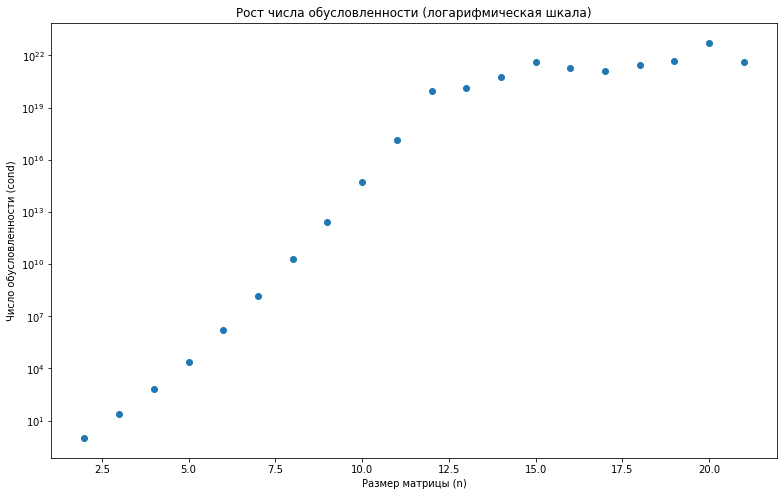

In [0]:
plt.figure(figsize=(13, 8))
plt.scatter(range(2, 22), cnd)
plt.yscale("log")
plt.title('Рост числа обусловленности (логарифмическая шкала)')
plt.ylabel('Число обусловленности (cond)')
plt.xlabel('Размер матрицы (n)')
plt.show()

Число обусловленности сильно растет в зависимости от $n$. 

Если не использовать логарифмическую шкалу, то график получается не наглядным - последняя точка всегда получается намного выше остальных.

До размера матрицы 11 рост числа обусловенности экспоненциальный, а дальше рост замедляется. Получаются очень большие числа, т.к. элементы матрицы очень маленькие (делим на большое число), соответственно, элементы обратной матрицы очень большие, и ее норма тоже очень большая. Рост числа обусловлености практически останавливается, когда норма обратной матрицы перестает изменяться (изменение нормы самой матрицы прекращается раньше).